In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('zoo.csv')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
x=df.iloc[:,1:17].values
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

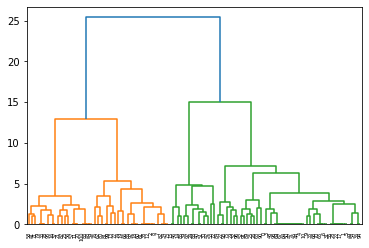

In [10]:
import scipy.cluster.hierarchy as sch
dnt=sch.dendrogram(sch.linkage(x,method='ward'))

In [12]:
from sklearn.cluster import AgglomerativeClustering
obj=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
ab=obj.fit_predict(x)
ab

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 2, 2, 3, 0, 1, 1, 3, 3,
       0, 3, 2, 0, 0, 4, 0, 4, 2, 0, 4, 3, 1, 0, 0, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 2, 1, 1, 4, 1, 1, 3, 3, 1, 1, 1, 3, 4, 2, 1, 3,
       2, 0, 0, 0, 1, 4, 0, 3, 4, 2, 0, 1, 3], dtype=int64)

In [18]:
from sklearn.metrics import mean_squared_error
ms=mean_squared_error(ab,df['class_type'])
ms

7.752475247524752